# Trabalho 3

* Aluno : Gabriel Borin Macedo
* RA : 197201

## Descrição do trabalho

## Parte 0 : Leitura das imagens

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt


# TODO : Preciso deixar um plot parecido com o da imagem do trabalho do Hélio
def plot_figures_in_line(image: np.ndarray, mask: np.ndarray, title1: str = "",
                         title2: str = "", **kwargs: dict) -> None:
    if "save_fig" in kwargs.keys():
        save_fig_name = kwargs.pop("save_fig")
        save_dir = kwargs.pop("save_dir")

    else:
        save_fig_name = ""
        save_dir = ""

    fig, ax = plt.subplots(2, 2, figsize=(15, 15))

    # Plot da imagem 1
    ax[0, 0].imshow(image, cmap=plt.cm.gray)
    ax[0, 0].set_title(title1)

    # Plot do histograma da imagem 1
    ax[0, 1].hist(image.ravel(), bins=256)
    ax[0, 1].set_title("Histograma {}".format(title1))

    # Plot da máscara/Imagem 2
    ax[1, 0].imshow(mask, cmap=plt.cm.gray)
    ax[1, 0].set_title(title2)

    # Plot do histograma da imagem 1. O motivo de repetir ele é apenas para deixar formatado em 4 imagens
    ax[1, 1].hist(image.ravel(), bins=256)
    ax[1, 1].set_title("Histograma {}".format(title1))

    for a in ax[:, 0]:
        a.axis('off')
    if save_fig_name:
        os.makedirs(save_dir, exist_ok=True)
        plt.savefig(save_dir + save_fig_name)

    plt.show()

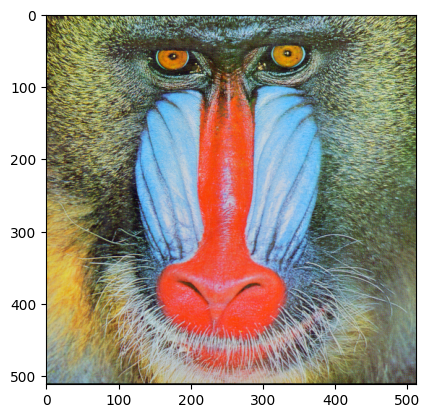

In [2]:
import cv2
import matplotlib.pyplot as plt

img_babbon_gray = cv2.imread("Imagens/baboon.png", 0)
img_babbon = cv2.imread("Imagens/baboon.png")[..., ::-1]

plt.imshow(img_babbon, vmin=img_babbon.min(), vmax=img_babbon.max())
plt.show()

## Parte 1 : Técnicas de Meios-Tons
Olhar https://github.com/10mrohit/floyd-steinberg-dithering/blob/master/main.py

In [3]:
import numpy as np


def _palette_reduce(img_pixel_val: np.uint8):
    return 255 * np.floor(img_pixel_val / 128)


# Parece que esta função tá aplicando os valores de erros de forma errada e ainda está acessando errado os índices. Vou investigar isso dps
def floyd(img: np.ndarray):
    new_img = img.copy()

    x_lim, y_lim, _ = new_img.shape

    for x in range(0, x_lim):
        for y in range(0, y_lim):
            red_oldpixel, green_oldpixel, blue_oldpixel = new_img[x, y]

            red_newpixel = _palette_reduce(red_oldpixel)
            green_newpixel = _palette_reduce(green_oldpixel)
            blue_newpixel = _palette_reduce(blue_oldpixel)

            new_img[x, y] = red_newpixel, green_newpixel, blue_newpixel

            red_error = red_oldpixel - red_newpixel
            blue_error = blue_oldpixel - blue_newpixel
            green_error = green_oldpixel - green_newpixel

            if x < x_lim - 1:
                red = new_img[x + 1, y][0] + np.round(red_error * 7 / 16)
                green = new_img[x + 1, y][1] + np.round(green_error * 7 / 16)
                blue = new_img[x + 1, y][2] + np.round(blue_error * 7 / 16)

                new_img[x + 1, y] = (red, green, blue)

            if x > 1 and y < y_lim - 1:
                red = new_img[x - 1, y + 1][0] + np.round(red_error * 3 / 16)
                green = new_img[x - 1, y + 1][1] + np.round(green_error * 3 / 16)
                blue = new_img[x - 1, y + 1][2] + np.round(blue_error * 3 / 16)

                new_img[x - 1, y + 1] = (red, green, blue)

            if y < y_lim - 1:
                red = new_img[x, y + 1][0] + np.round(red_error * 5 / 16)
                green = new_img[x, y + 1][1] + np.round(green_error * 5 / 16)
                blue = new_img[x, y + 1][2] + np.round(blue_error * 5 / 16)

                new_img[x, y + 1] = (red, green, blue)

            if x < x_lim - 1 and y < y_lim - 1:
                red = new_img[x + 1, y + 1][0] + np.round(red_error * 1 / 16)
                green = new_img[x + 1, y + 1][1] + np.round(green_error * 1 / 16)
                blue = new_img[x + 1, y + 1][2] + np.round(blue_error * 1 / 16)

                new_img[x + 1, y + 1] = (red, green, blue)

    return new_img


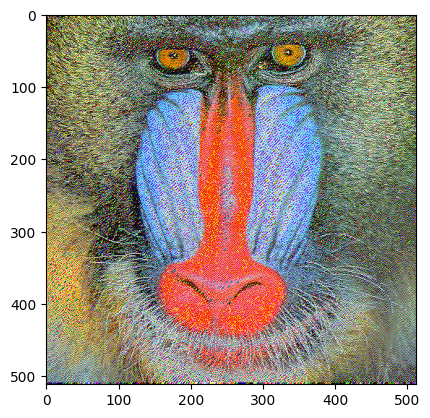

In [4]:
img_babbon_floyd = floyd(img_babbon)

plt.imshow(img_babbon_floyd, vmin=img_babbon_floyd.min(), vmax=img_babbon_floyd.max())
plt.show()

## Parte 2 : Stevenson

In [5]:
def steve(img: np.ndarray):
    new_img = img.copy()

    x_lim, y_lim, _ = new_img.shape

    for x in range(0, x_lim):
        for y in range(0, y_lim):
            red_oldpixel, green_oldpixel, blue_oldpixel = new_img[x, y]

            red_newpixel = _palette_reduce(red_oldpixel)
            green_newpixel = _palette_reduce(green_oldpixel)
            blue_newpixel = _palette_reduce(blue_oldpixel)

            new_img[x, y] = red_newpixel, green_newpixel, blue_newpixel

            red_error = red_oldpixel - red_newpixel
            blue_error = blue_oldpixel - blue_newpixel
            green_error = green_oldpixel - green_newpixel

            if y + 2 < y_lim:
                red = new_img[x, y + 2][0] + np.round(red_error * 32 / 200)
                green = new_img[x, y + 2][1] + np.round(green_error * 32 / 200)
                blue = new_img[x, y + 2][2] + np.round(blue_error * 32 / 200)

                new_img[x, y + 2] = (red, green, blue)

            if y - 3 >= 0 and x + 1 < x_lim:
                red = new_img[x + 1, y - 3][0] + np.round(red_error * 12 / 200)
                green = new_img[x + 1, y - 3][1] + np.round(green_error * 12 / 200)
                blue = new_img[x + 1, y - 3][2] + np.round(blue_error * 12 / 200)

                new_img[x + 1, y - 3] = (red, green, blue)

            if y - 1 >= 0 and x + 1 < x_lim:
                red = new_img[x + 1, y - 1][0] + np.round(red_error * 26 / 200)
                green = new_img[x + 1, y - 1][1] + np.round(green_error * 26 / 200)
                blue = new_img[x + 1, y - 1][2] + np.round(blue_error * 26 / 200)

                new_img[x + 1, y - 1] = (red, green, blue)

            if y + 1 < y_lim and x + 1 < x_lim:
                red = new_img[x + 1, y + 1][0] + np.round(red_error * 30 / 200)
                green = new_img[x + 1, y + 1][1] + np.round(green_error * 30 / 200)
                blue = new_img[x + 1, y + 1][2] + np.round(blue_error * 30 / 200)

                new_img[x + 1, y + 1] = (red, green, blue)

            if y + 3 < y_lim and x + 1 < x_lim:
                red = new_img[x + 1, y + 3][0] + np.round(red_error * 16 / 200)
                green = new_img[x + 1, y + 3][1] + np.round(green_error * 16 / 200)
                blue = new_img[x + 1, y + 3][2] + np.round(blue_error * 16 / 200)

                new_img[x + 1, y + 3] = (red, green, blue)

            if y - 2 >= 0 and x + 2 < x_lim:
                red = new_img[x + 2, y - 2][0] + np.round(red_error * 12 / 200)
                green = new_img[x + 2, y - 2][1] + np.round(green_error * 12 / 200)
                blue = new_img[x + 2, y - 2][2] + np.round(blue_error * 12 / 200)

                new_img[x + 2, y - 2] = (red, green, blue)

            if y < y_lim and x + 2 < x_lim:
                red = new_img[x + 2, y][0] + np.round(red_error * 26 / 200)
                green = new_img[x + 2, y][1] + np.round(green_error * 26 / 200)
                blue = new_img[x + 2, y][2] + np.round(blue_error * 26 / 200)

                new_img[x + 2, y] = (red, green, blue)

            if y + 2 < y_lim and x + 2 < x_lim:
                red = new_img[x + 2, y + 2][0] + np.round(red_error * 12 / 200)
                green = new_img[x + 2, y + 2][1] + np.round(green_error * 12 / 200)
                blue = new_img[x + 2, y + 2][2] + np.round(blue_error * 12 / 200)

                new_img[x + 2, y + 2] = (red, green, blue)

            if y - 3 >= 0 and x + 3 < x_lim:
                red = new_img[x + 3, y - 3][0] + np.round(red_error * 5 / 200)
                green = new_img[x + 3, y - 3][1] + np.round(green_error * 5 / 200)
                blue = new_img[x + 3, y - 3][2] + np.round(blue_error * 5 / 200)

                new_img[x + 3, y - 3] = (red, green, blue)

            if y - 1 >= 0 and x + 3 < x_lim:
                red = new_img[x + 3, y - 1][0] + np.round(red_error * 12 / 200)
                green = new_img[x + 3, y - 1][1] + np.round(green_error * 12 / 200)
                blue = new_img[x + 3, y - 1][2] + np.round(blue_error * 12 / 200)

                new_img[x + 3, y - 3] = (red, green, blue)

            if y + 1 < y_lim and x + 3 < x_lim:
                red = new_img[x + 3, y + 1][0] + np.round(red_error * 12 / 200)
                green = new_img[x + 3, y + 1][1] + np.round(green_error * 12 / 200)
                blue = new_img[x + 3, y + 1][2] + np.round(blue_error * 12 / 200)

                new_img[x + 3, y + 1] = (red, green, blue)

            if y + 3 < y_lim and x + 3 < x_lim:
                red = new_img[x + 3, y + 3][0] + np.round(red_error * 5 / 200)
                green = new_img[x + 3, y + 3][1] + np.round(green_error * 5 / 200)
                blue = new_img[x + 3, y + 3][2] + np.round(blue_error * 5 / 200)

                new_img[x + 3, y + 3] = (red, green, blue)

    return new_img

is equal : [[[ True  True  True]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True False  True]
  [False  True False]
  [ True  True False]]

 [[False False  True]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]

 [[False  True  True]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]

 ...

 [[ True False False]
  [False False False]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]

 [[ True False  True]
  [False False  True]
  [False False False]
  ...
  [False False False]
  [False False False]
  [False False False]]

 [[False False False]
  [ True  True  True]
  [ True  True  True]
  ...
  [ True  True False]
  [ True False  True]
  [False  True False]]]


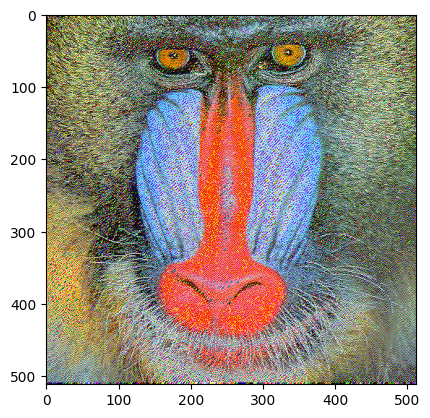

In [6]:
img_babbon_steve = steve(img_babbon)

plt.imshow(img_babbon_floyd, vmin=img_babbon_floyd.min(), vmax=img_babbon_floyd.max())
plt.show()

In [7]:
print("is equal : {}".format(np.array_equal(img_babbon_steve, img_babbon_floyd)))

is equal : False


## Burkes

In [6]:
def burkes(img: np.ndarray):
    new_img = img.copy()

    x_lim, y_lim, _ = new_img.shape

    for x in range(0, x_lim):
        for y in range(0, y_lim):
            red_oldpixel, green_oldpixel, blue_oldpixel = new_img[x, y]

            red_newpixel = _palette_reduce(red_oldpixel)
            green_newpixel = _palette_reduce(green_oldpixel)
            blue_newpixel = _palette_reduce(blue_oldpixel)

            new_img[x, y] = red_newpixel, green_newpixel, blue_newpixel

            red_error = red_oldpixel - red_newpixel
            blue_error = blue_oldpixel - blue_newpixel
            green_error = green_oldpixel - green_newpixel

            if y + 1 < y_lim:
                red = new_img[x, y + 1][0] + np.round(red_error * 8 / 32)
                green = new_img[x, y + 1][1] + np.round(green_error * 8 / 32)
                blue = new_img[x, y + 1][2] + np.round(blue_error * 8 / 32)

                new_img[x, y + 1] = (red, green, blue)

            if y + 2 < y_lim:
                red = new_img[x, y + 2][0] + np.round(red_error * 4 / 32)
                green = new_img[x, y + 2][1] + np.round(green_error * 4 / 32)
                blue = new_img[x, y + 2][2] + np.round(blue_error * 4 / 32)

                new_img[x, y + 2] = (red, green, blue)

            if y - 2 >= 0 and x + 1 < x_lim:
                red = new_img[x + 1, y - 2][0] + np.round(red_error * 2 / 32)
                green = new_img[x + 1, y - 2][1] + np.round(green_error * 2 / 32)
                blue = new_img[x + 1, y - 2][2] + np.round(blue_error * 2 / 32)

                new_img[x + 1, y - 2] = (red, green, blue)

            if y - 1 >= 0 and x + 1 < x_lim:
                red = new_img[x + 1, y - 1][0] + np.round(red_error * 4 / 32)
                green = new_img[x + 1, y - 1][1] + np.round(green_error * 4 / 32)
                blue = new_img[x + 1, y - 1][2] + np.round(blue_error * 4 / 32)

                new_img[x + 1, y - 1] = (red, green, blue)

            if y < y_lim and x + 1 < x_lim:
                red = new_img[x + 1, y][0] + np.round(red_error * 8 / 32)
                green = new_img[x + 1, y][1] + np.round(green_error * 8 / 32)
                blue = new_img[x + 1, y][2] + np.round(blue_error * 8 / 32)

                new_img[x + 1, y] = (red, green, blue)

            if y + 1 < y_lim and x + 1 < x_lim:
                red = new_img[x + 1, y + 1][0] + np.round(red_error * 4 / 32)
                green = new_img[x + 1, y + 1][1] + np.round(green_error * 4 / 32)
                blue = new_img[x + 1, y + 1][2] + np.round(blue_error * 4 / 32)

                new_img[x + 1, y + 1] = (red, green, blue)

            if y + 2 < y_lim and x + 1 < x_lim:
                red = new_img[x + 1, y + 2][0] + np.round(red_error * 2 / 32)
                green = new_img[x + 1, y + 2][1] + np.round(green_error * 2 / 32)
                blue = new_img[x + 1, y + 2][2] + np.round(blue_error * 2 / 32)

                new_img[x + 1, y + 2] = (red, green, blue)

    return new_img

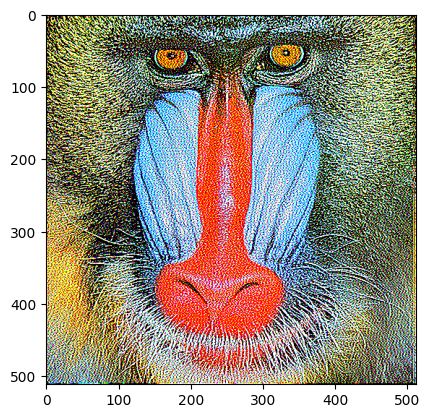

In [8]:
img_babbon_burkes = steve(img_babbon)

plt.imshow(img_babbon_burkes, vmin=img_babbon_burkes.min(), vmax=img_babbon_burkes.max())
plt.show()

## Sierra

In [9]:
def sierra(img: np.ndarray):
    new_img = img.copy()

    x_lim, y_lim, _ = new_img.shape

    for x in range(0, x_lim):
        for y in range(0, y_lim):
            red_oldpixel, green_oldpixel, blue_oldpixel = new_img[x, y]

            red_newpixel = _palette_reduce(red_oldpixel)
            green_newpixel = _palette_reduce(green_oldpixel)
            blue_newpixel = _palette_reduce(blue_oldpixel)

            new_img[x, y] = red_newpixel, green_newpixel, blue_newpixel

            red_error = red_oldpixel - red_newpixel
            blue_error = blue_oldpixel - blue_newpixel
            green_error = green_oldpixel - green_newpixel

            if y + 1 < y_lim:
                red = new_img[x, y + 1][0] + np.round(red_error * 5 / 32)
                green = new_img[x, y + 1][1] + np.round(green_error * 5 / 32)
                blue = new_img[x, y + 1][2] + np.round(blue_error * 5 / 32)

                new_img[x, y + 1] = (red, green, blue)

            if y + 2 < y_lim:
                red = new_img[x, y + 2][0] + np.round(red_error * 3 / 32)
                green = new_img[x, y + 2][1] + np.round(green_error * 3 / 32)
                blue = new_img[x, y + 2][2] + np.round(blue_error * 3 / 32)

                new_img[x, y + 2] = (red, green, blue)

            if y - 2 >= 0 and x + 1 < x_lim:
                red = new_img[x + 1, y - 2][0] + np.round(red_error * 2 / 32)
                green = new_img[x + 1, y - 2][1] + np.round(green_error * 2 / 32)
                blue = new_img[x + 1, y - 2][2] + np.round(blue_error * 2 / 32)

                new_img[x + 1, y - 2] = (red, green, blue)

            if y - 1 >= 0 and x + 1 < x_lim:
                red = new_img[x + 1, y - 1][0] + np.round(red_error * 4 / 32)
                green = new_img[x + 1, y - 1][1] + np.round(green_error * 4 / 32)
                blue = new_img[x + 1, y - 1][2] + np.round(blue_error * 4 / 32)

                new_img[x + 1, y - 1] = (red, green, blue)

            if y < y_lim and x + 1 < x_lim:
                red = new_img[x + 1, y][0] + np.round(red_error * 5 / 32)
                green = new_img[x + 1, y][1] + np.round(green_error * 5 / 32)
                blue = new_img[x + 1, y][2] + np.round(blue_error * 5 / 32)

                new_img[x + 1, y] = (red, green, blue)

            if y + 1 < y_lim and x + 1 < x_lim:
                red = new_img[x + 1, y + 1][0] + np.round(red_error * 4 / 32)
                green = new_img[x + 1, y + 1][1] + np.round(green_error * 4 / 32)
                blue = new_img[x + 1, y + 1][2] + np.round(blue_error * 4 / 32)

                new_img[x + 1, y + 1] = (red, green, blue)

            if y + 2 < y_lim and x + 1 < x_lim:
                red = new_img[x + 1, y + 2][0] + np.round(red_error * 2 / 32)
                green = new_img[x + 1, y + 2][1] + np.round(green_error * 2 / 32)
                blue = new_img[x + 1, y + 2][2] + np.round(blue_error * 2 / 32)

                new_img[x + 1, y + 2] = (red, green, blue)

            if y - 1 >= 0 and x + 2 < x_lim:
                red = new_img[x + 2, y - 1][0] + np.round(red_error * 2 / 32)
                green = new_img[x + 2, y - 1][1] + np.round(green_error * 2 / 32)
                blue = new_img[x + 2, y - 1][2] + np.round(blue_error * 2 / 32)

                new_img[x + 2, y - 1] = (red, green, blue)

            if y < y_lim and x + 2 < x_lim:
                red = new_img[x + 2, y][0] + np.round(red_error * 3 / 32)
                green = new_img[x + 2, y][1] + np.round(green_error * 3 / 32)
                blue = new_img[x + 2, y][2] + np.round(blue_error * 3 / 32)

                new_img[x + 1, y] = (red, green, blue)

            if y + 1 < y_lim and x + 2 < x_lim:
                red = new_img[x + 2, y + 1][0] + np.round(red_error * 4 / 32)
                green = new_img[x + 2, y + 1][1] + np.round(green_error * 4 / 32)
                blue = new_img[x + 2, y + 1][2] + np.round(blue_error * 4 / 32)

                new_img[x + 2, y + 1] = (red, green, blue)

    return new_img

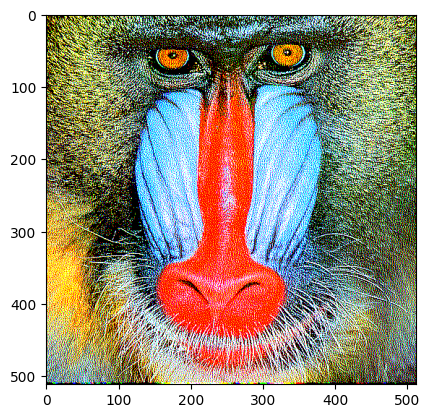

In [10]:
img_babbon_sierra = sierra(img_babbon)

plt.imshow(img_babbon_sierra, vmin=img_babbon_sierra.min(), vmax=img_babbon_sierra.max())
plt.show()

## Stucki

In [12]:
def stuki(img: np.ndarray):
    new_img = img.copy()

    x_lim, y_lim, _ = new_img.shape

    for x in range(0, x_lim):
        for y in range(0, y_lim):
            red_oldpixel, green_oldpixel, blue_oldpixel = new_img[x, y]

            red_newpixel = _palette_reduce(red_oldpixel)
            green_newpixel = _palette_reduce(green_oldpixel)
            blue_newpixel = _palette_reduce(blue_oldpixel)

            new_img[x, y] = red_newpixel, green_newpixel, blue_newpixel

            red_error = red_oldpixel - red_newpixel
            blue_error = blue_oldpixel - blue_newpixel
            green_error = green_oldpixel - green_newpixel

            if y + 1 < y_lim:
                red = new_img[x, y + 1][0] + np.round(red_error * 8 / 42)
                green = new_img[x, y + 1][1] + np.round(green_error * 8 / 42)
                blue = new_img[x, y + 1][2] + np.round(blue_error * 8 / 42)

                new_img[x, y + 1] = (red, green, blue)

            if y + 2 < y_lim:
                red = new_img[x, y + 2][0] + np.round(red_error * 4 / 42)
                green = new_img[x, y + 2][1] + np.round(green_error * 4 / 42)
                blue = new_img[x, y + 2][2] + np.round(blue_error * 4 / 42)

                new_img[x, y + 2] = (red, green, blue)

            if y - 2 >= 0 and x + 1 < x_lim:
                red = new_img[x + 1, y - 2][0] + np.round(red_error * 2 / 42)
                green = new_img[x + 1, y - 2][1] + np.round(green_error * 2 / 42)
                blue = new_img[x + 1, y - 2][2] + np.round(blue_error * 2 / 42)

                new_img[x + 1, y - 2] = (red, green, blue)

            if y - 1 >= 0 and x + 1 < x_lim:
                red = new_img[x + 1, y - 1][0] + np.round(red_error * 4 / 42)
                green = new_img[x + 1, y - 1][1] + np.round(green_error * 4 / 42)
                blue = new_img[x + 1, y - 1][2] + np.round(blue_error * 4 / 42)

                new_img[x + 1, y - 1] = (red, green, blue)

            if y < y_lim and x + 1 < x_lim:
                red = new_img[x + 1, y][0] + np.round(red_error * 8 / 42)
                green = new_img[x + 1, y][1] + np.round(green_error * 8 / 42)
                blue = new_img[x + 1, y][2] + np.round(blue_error * 8 / 42)

                new_img[x + 1, y] = (red, green, blue)

            if y + 1 < y_lim and x + 1 < x_lim:
                red = new_img[x + 1, y + 1][0] + np.round(red_error * 4 / 42)
                green = new_img[x + 1, y + 1][1] + np.round(green_error * 4 / 42)
                blue = new_img[x + 1, y + 1][2] + np.round(blue_error * 4 / 42)

                new_img[x + 1, y + 1] = (red, green, blue)

            if y + 2 < y_lim and x + 1 < x_lim:
                red = new_img[x + 1, y + 2][0] + np.round(red_error * 2 / 42)
                green = new_img[x + 1, y + 2][1] + np.round(green_error * 2 / 42)
                blue = new_img[x + 1, y + 2][2] + np.round(blue_error * 2 / 42)

                new_img[x + 1, y + 2] = (red, green, blue)

            if y - 2 >= 0 and x + 2 < x_lim:
                red = new_img[x + 2, y - 2][0] + np.round(red_error * 1 / 32)
                green = new_img[x + 2, y - 2][1] + np.round(green_error * 1 / 32)
                blue = new_img[x + 2, y - 2][2] + np.round(blue_error * 1 / 32)

                new_img[x + 2, y - 2] = (red, green, blue)

            if y - 1 >= 0 and x + 2 < x_lim:
                red = new_img[x + 2, y - 1][0] + np.round(red_error * 2 / 42)
                green = new_img[x + 2, y - 1][1] + np.round(green_error * 2 / 42)
                blue = new_img[x + 2, y - 1][2] + np.round(blue_error * 2 / 42)

                new_img[x + 2, y - 1] = (red, green, blue)

            if y < y_lim and x + 2 < x_lim:
                red = new_img[x + 2, y][0] + np.round(red_error * 4 / 42)
                green = new_img[x + 2, y][1] + np.round(green_error * 4 / 42)
                blue = new_img[x + 2, y][2] + np.round(blue_error * 4 / 42)

                new_img[x + 1, y] = (red, green, blue)

            if y + 1 < y_lim and x + 2 < x_lim:
                red = new_img[x + 2, y + 1][0] + np.round(red_error * 2 / 42)
                green = new_img[x + 2, y + 1][1] + np.round(green_error * 2 / 42)
                blue = new_img[x + 2, y + 1][2] + np.round(blue_error * 2 / 42)

                new_img[x + 2, y + 1] = (red, green, blue)

            if y + 2 < y_lim and x + 2 < x_lim:
                red = new_img[x + 2, y + 2][0] + np.round(red_error * 1 / 42)
                green = new_img[x + 2, y + 2][1] + np.round(green_error * 1 / 42)
                blue = new_img[x + 2, y + 2][2] + np.round(blue_error * 1 / 42)

                new_img[x + 2, y + 2] = (red, green, blue)

    return new_img

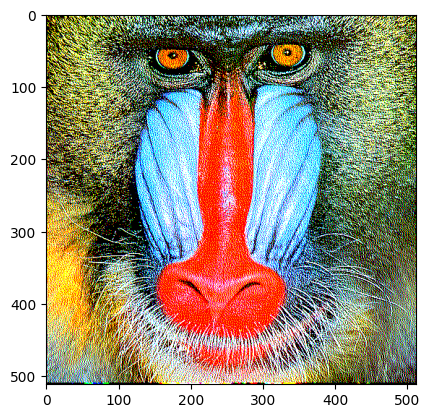

In [13]:
img_babbon_stucki = stuki(img_babbon)

plt.imshow(img_babbon_stucki, vmin=img_babbon_stucki.min(), vmax=img_babbon_stucki.max())
plt.show()

## Jarvis

In [14]:
def jarvis(img: np.ndarray):
    new_img = img.copy()

    x_lim, y_lim, _ = new_img.shape

    for x in range(0, x_lim):
        for y in range(0, y_lim):
            red_oldpixel, green_oldpixel, blue_oldpixel = new_img[x, y]

            red_newpixel = _palette_reduce(red_oldpixel)
            green_newpixel = _palette_reduce(green_oldpixel)
            blue_newpixel = _palette_reduce(blue_oldpixel)

            new_img[x, y] = red_newpixel, green_newpixel, blue_newpixel

            red_error = red_oldpixel - red_newpixel
            blue_error = blue_oldpixel - blue_newpixel
            green_error = green_oldpixel - green_newpixel

            if y + 1 < y_lim:
                red = new_img[x, y + 1][0] + np.round(red_error * 7 / 48)
                green = new_img[x, y + 1][1] + np.round(green_error * 7 / 48)
                blue = new_img[x, y + 1][2] + np.round(blue_error * 7 / 48)

                new_img[x, y + 1] = (red, green, blue)

            if y + 2 < y_lim:
                red = new_img[x, y + 2][0] + np.round(red_error * 5 / 48)
                green = new_img[x, y + 2][1] + np.round(green_error * 5 / 48)
                blue = new_img[x, y + 2][2] + np.round(blue_error * 5 / 48)

                new_img[x, y + 2] = (red, green, blue)

            if y - 2 >= 0 and x + 1 < x_lim:
                red = new_img[x + 1, y - 2][0] + np.round(red_error * 3 / 48)
                green = new_img[x + 1, y - 2][1] + np.round(green_error * 3 / 48)
                blue = new_img[x + 1, y - 2][2] + np.round(blue_error * 3 / 48)

                new_img[x + 1, y - 2] = (red, green, blue)

            if y - 1 >= 0 and x + 1 < x_lim:
                red = new_img[x + 1, y - 1][0] + np.round(red_error * 5 / 48)
                green = new_img[x + 1, y - 1][1] + np.round(green_error * 5 / 48)
                blue = new_img[x + 1, y - 1][2] + np.round(blue_error * 5 / 48)

                new_img[x + 1, y - 1] = (red, green, blue)

            if y < y_lim and x + 1 < x_lim:
                red = new_img[x + 1, y][0] + np.round(red_error * 7 / 48)
                green = new_img[x + 1, y][1] + np.round(green_error * 7 / 48)
                blue = new_img[x + 1, y][2] + np.round(blue_error * 7 / 48)

                new_img[x + 1, y] = (red, green, blue)

            if y + 1 < y_lim and x + 1 < x_lim:
                red = new_img[x + 1, y + 1][0] + np.round(red_error * 5 / 48)
                green = new_img[x + 1, y + 1][1] + np.round(green_error * 5 / 48)
                blue = new_img[x + 1, y + 1][2] + np.round(blue_error * 5 / 48)

                new_img[x + 1, y + 1] = (red, green, blue)

            if y + 2 < y_lim and x + 1 < x_lim:
                red = new_img[x + 1, y + 2][0] + np.round(red_error * 3 / 48)
                green = new_img[x + 1, y + 2][1] + np.round(green_error * 3 / 48)
                blue = new_img[x + 1, y + 2][2] + np.round(blue_error * 3 / 48)

                new_img[x + 1, y + 2] = (red, green, blue)

            if y - 2 >= 0 and x + 2 < x_lim:
                red = new_img[x + 2, y - 2][0] + np.round(red_error * 1 / 48)
                green = new_img[x + 2, y - 2][1] + np.round(green_error * 1 / 48)
                blue = new_img[x + 2, y - 2][2] + np.round(blue_error * 1 / 48)

                new_img[x + 2, y - 2] = (red, green, blue)

            if y - 1 >= 0 and x + 2 < x_lim:
                red = new_img[x + 2, y - 1][0] + np.round(red_error * 3 / 48)
                green = new_img[x + 2, y - 1][1] + np.round(green_error * 3 / 48)
                blue = new_img[x + 2, y - 1][2] + np.round(blue_error * 3 / 48)

                new_img[x + 2, y - 1] = (red, green, blue)

            if y < y_lim and x + 2 < x_lim:
                red = new_img[x + 2, y][0] + np.round(red_error * 5 / 48)
                green = new_img[x + 2, y][1] + np.round(green_error * 5 / 48)
                blue = new_img[x + 2, y][2] + np.round(blue_error * 5 / 48)

                new_img[x + 1, y] = (red, green, blue)

            if y + 1 < y_lim and x + 2 < x_lim:
                red = new_img[x + 2, y + 1][0] + np.round(red_error * 3 / 48)
                green = new_img[x + 2, y + 1][1] + np.round(green_error * 3 / 48)
                blue = new_img[x + 2, y + 1][2] + np.round(blue_error * 3 / 48)

                new_img[x + 2, y + 1] = (red, green, blue)

            if y + 2 < y_lim and x + 2 < x_lim:
                red = new_img[x + 2, y + 2][0] + np.round(red_error * 1 / 48)
                green = new_img[x + 2, y + 2][1] + np.round(green_error * 1 / 48)
                blue = new_img[x + 2, y + 2][2] + np.round(blue_error * 1 / 48)

                new_img[x + 2, y + 2] = (red, green, blue)

    return new_img

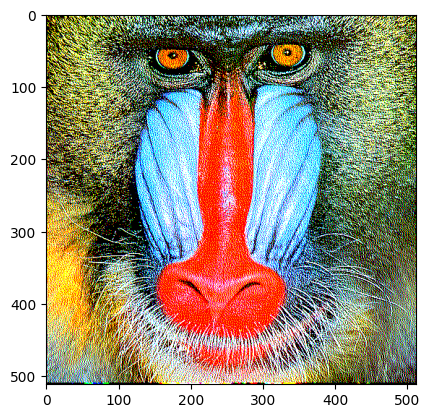

In [15]:
img_babbon_jarvis = stuki(img_babbon)

plt.imshow(img_babbon_jarvis, vmin=img_babbon_jarvis.min(), vmax=img_babbon_jarvis.max())
plt.show()